### Pre-processing Data

In [31]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import tensorflow as tf

import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
# Set theme
sns.set_style('darkgrid', {
    'grid.linestyle': ':',
    'grid.linewidth': 1.0})

plt.style.use('dark_background')

# Set version number of neural network
nn_vers = 1

In [33]:
#  Import and read the charity_data.csv
application_df = pd.read_csv("Data/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [34]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'
application_df.drop(columns=['EIN', 'NAME'], inplace=True)

In [35]:
# Determine the number of unique values in each column
app_unique = application_df.nunique()
app_unique

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [36]:
# Store list of columns with more than 10 unique values
unique_cols = list(application_df.columns[(app_unique > 10)])
unique_cols

['APPLICATION_TYPE', 'CLASSIFICATION', 'ASK_AMT']

In [37]:
# Look at APPLICATION_TYPE value counts for binning
app_counts = application_df['APPLICATION_TYPE'].value_counts()
app_counts

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

<AxesSubplot:ylabel='Density'>

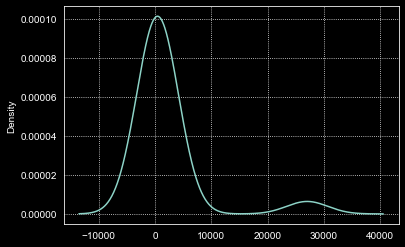

In [38]:
# Visualize the value counts of APPLICATION_TYPE
app_counts.plot.density()

<AxesSubplot:ylabel='Density'>

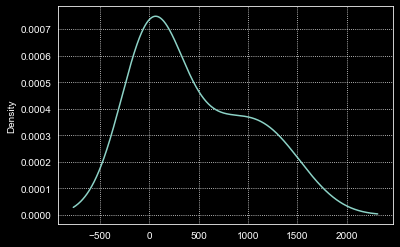

In [39]:
# Remove outlier to examine graph at higher resolution
app_counts[1:].plot.density()

In [40]:
# Store list of applications to replace (if type occurs less than 500 times)
replace_application = list(app_counts[app_counts < 500].index)

# Replace in DataFrame
for app in replace_application:
    application_df.APPLICATION_TYPE = application_df.APPLICATION_TYPE.replace(app,"Other")
    
# Check to make sure binning was successful
application_df.APPLICATION_TYPE.value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [41]:
# Look at CLASSIFICATION value counts for binning
class_counts = application_df['CLASSIFICATION'].value_counts()
class_counts[:15]

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
C2800       95
C7100       75
C1300       58
C1280       50
Name: CLASSIFICATION, dtype: int64

<AxesSubplot:ylabel='Density'>

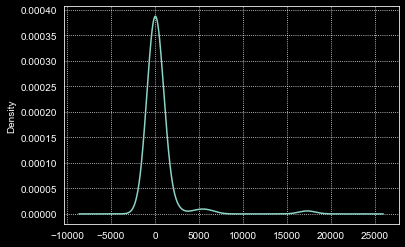

In [12]:
# Visualize the value counts of CLASSIFICATION
class_counts.plot.density()

<AxesSubplot:ylabel='Density'>

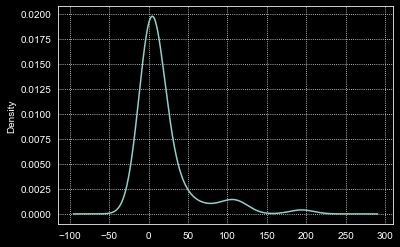

In [13]:
# Remove outliers to examine graph at higher resolution
class_counts[7:].plot.density()

In [14]:
# Store list of applications to replace (if type occurs less than 150 times)
replace_class = list(class_counts[class_counts < 150].index)

# Replace in dataframe
for cls in replace_class:
    application_df.CLASSIFICATION = application_df.CLASSIFICATION.replace(cls,"Other")
    
# Check to make sure binning was successful
application_df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
Other     1003
C7000      777
C1700      287
C4000      194
Name: CLASSIFICATION, dtype: int64

In [15]:
# Check DataFrame data types
# Ask_amount is numerical and does not need categorization.
application_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34299 entries, 0 to 34298
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   APPLICATION_TYPE        34299 non-null  object
 1   AFFILIATION             34299 non-null  object
 2   CLASSIFICATION          34299 non-null  object
 3   USE_CASE                34299 non-null  object
 4   ORGANIZATION            34299 non-null  object
 5   STATUS                  34299 non-null  int64 
 6   INCOME_AMT              34299 non-null  object
 7   SPECIAL_CONSIDERATIONS  34299 non-null  object
 8   ASK_AMT                 34299 non-null  int64 
 9   IS_SUCCESSFUL           34299 non-null  int64 
dtypes: int64(3), object(7)
memory usage: 2.6+ MB


In [16]:
# Generate list of columns to be categorized
application_cat = application_df.dtypes[application_df.dtypes == "object"]\
    .index.tolist()
application_cat

['APPLICATION_TYPE',
 'AFFILIATION',
 'CLASSIFICATION',
 'USE_CASE',
 'ORGANIZATION',
 'INCOME_AMT',
 'SPECIAL_CONSIDERATIONS']

In [17]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(application_df[application_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names_out(application_cat)
encode_df.head()

,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,AFFILIATION_CompanySponsored,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [18]:
# Merge one-hot encoded features and drop the originals
application_df = application_df.merge(encode_df, left_index=True, right_index=True)
application_df = application_df.drop(columns=application_cat) 
application_df.head()

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,108590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,5000,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,6692,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,142590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [42]:
# Save merged DataFrame
application_df.to_csv(f'./Data/applications_encoded_{nn_vers}.csv')

In [20]:
# Split the preprocessed data into features and target arrays
y = application_df["IS_SUCCESSFUL"].values
X = application_df.drop(columns=["IS_SUCCESSFUL"]).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [21]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

### Compile the Model

In [22]:
# Define number of input features and hidden nodes for each layer
inputs_len = len(X_train_scaled[0])

n_scale_l1 = 2
n_scale_l2 = 2

nodes_l1 = round(inputs_len * n_scale_l1)
nodes_l2 = round(inputs_len * n_scale_l2)

# Instantiate the deep neural net model
nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(
    units=nodes_l1,
    activation="relu",
    input_dim=inputs_len))

# Second hidden layer
nn.add(tf.keras.layers.Dense(
    units=nodes_l2,
    activation="relu",
    input_dim=nodes_l1))

# Output layer
nn.add(tf.keras.layers.Dense(
    units=1,
    activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 92)                4324      
                                                                 
 dense_1 (Dense)             (None, 92)                8556      
                                                                 
 dense_2 (Dense)             (None, 1)                 93        
                                                                 
Total params: 12,973
Trainable params: 12,973
Non-trainable params: 0
_________________________________________________________________


In [23]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [24]:
# Create checkpoint
os.makedirs(f'Checkpoints/v{nn_vers}', exist_ok=True)
checkpoint_path = f'Checkpoints/v{nn_vers}/' +'weights.{epoch:02d}.hdf5'

cp_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq='epoch',
    period=5)

In [25]:
# Train the model
fit_model = nn.fit(
    X_train_scaled,
    y_train,
    epochs=100,
    callbacks=[cp_callback])

Epoch 1/100
804/804 [==============================] - 2s 1ms/step - loss: 0.5700 - accuracy: 0.7227
Epoch 2/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5557 - accuracy: 0.7304
Epoch 3/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5523 - accuracy: 0.7310
Epoch 4/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5509 - accuracy: 0.7312
Epoch 5/100
761/804 [===========================>..] - ETA: 0s - loss: 0.5483 - accuracy: 0.7328
Epoch 5: saving model to Checkpoints/v1\weights.05.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.5479 - accuracy: 0.7331
Epoch 6/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5472 - accuracy: 0.7336
Epoch 7/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5469 - accuracy: 0.7350
Epoch 8/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5457 - accuracy: 0.7338
Epoch 9/100
804/804 [==============================

### Evaluate Model for Loss and Accuracy

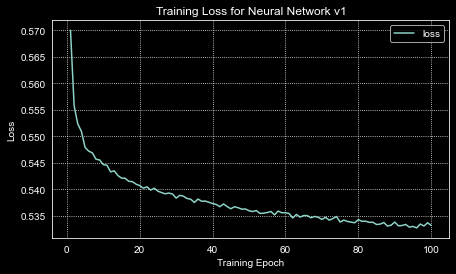

In [26]:
# Create DataFrame containing training history
history_df = pd.DataFrame(
    fit_model.history,
    index=range(1, len(fit_model.history["loss"])+1))

history_df.plot(
    y='loss',
    xlabel='Training Epoch',
    ylabel='Loss',
    title=f'Training Loss for Neural Network v{nn_vers}',
    figsize=((16/9 * 4), 4)
)

plt.savefig(f'Images/v{nn_vers}_loss.png')

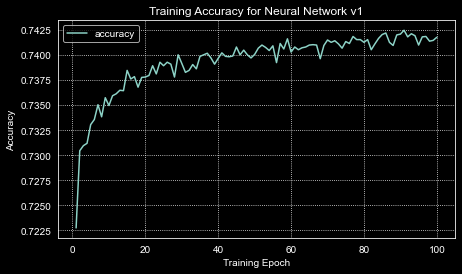

In [27]:
history_df.plot(
    y='accuracy',
    xlabel='Training Epoch',
    ylabel='Accuracy',
    title=f'Training Accuracy for Neural Network v{nn_vers}',
    figsize=((16/9 * 4), 4)
)

plt.savefig(f'Images/v{nn_vers}_accuracy.png')

In [28]:
# Evaluate the model using the test data
print(f'Neural Network Version {nn_vers} Test Evaluation')
model_loss, model_accuracy = nn.evaluate(X_test_scaled, y_test, verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Neural Network Version 1 Test Evaluation
268/268 - 0s - loss: 0.5586 - accuracy: 0.7256 - 375ms/epoch - 1ms/step
Loss: 0.5585901141166687, Accuracy: 0.7255976796150208


In [29]:
# Export model to HDF5 file
nn.save(f'Trained_Models/trained_model_{nn_vers}.h5')

In [30]:
# Import model to check save
nn_imported = tf.keras.models.load_model(f'Trained_Models/trained_model_{nn_vers}.h5')

print(f'Imported Neural Network Version {nn_vers} Test Evaluation')
model_loss, model_accuracy = nn_imported.evaluate(X_test_scaled, y_test, verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Imported Neural Network Version 1 Test Evaluation
268/268 - 0s - loss: 0.5586 - accuracy: 0.7256 - 343ms/epoch - 1ms/step
Loss: 0.5585901141166687, Accuracy: 0.7255976796150208
